In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as dd
from dask.distributed import Client
import dask
import time
import random 
#from sklearn.linear_model import LinearRegression
df = pd.read_csv ('Trips_by_Distance.csv')
df2= pd.read_csv ('Trips_Full Data.csv')
#df['Date'] = pd.to_datetime(df['Date']) #this changing the data type from an object to datetime object


/var/folders/_c/plq7rzt57pl127fc12_lbc040000gn/T/ipykernel_44159/2499162737.py:4: DeprecationWarning: The current Dask DataFrame implementation is deprecated. 
In a future release, Dask DataFrame will use a new implementation that
contains several improvements including a logical query planning.
The user-facing DataFrame API will remain unchanged.

The new implementation is already available and can be enabled by
installing the dask-expr library:

    $ pip install dask-expr

and turning the query planning option on:

    >>> import dask
    >>> dask.config.set({'dataframe.query-planning': True})
    >>> import dask.dataframe as dd

API documentation for the new implementation is available at
https://docs.dask.org/en/stable/dask-expr-api.html

Any feedback can be reported on the Dask issue tracker
https://github.com/dask/dask/issues 

To disable this warning in the future, set dask config:

    # via Python
    >>> dask.config.set({'dataframe.query-planning-warning': False})

    # via

In [7]:
df.head()

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month
0,National,1/1/2019,NaN,NaN,NaN,NaN,77433867.0,248733553.0,8.977844e+08,241667151.0,...,129670778.0,116904343.0,40432062.0,15686639.0,7525563.0,1806022.0,1728112.0,00-00000-20190101,0,1
1,National,1/2/2019,NaN,NaN,NaN,NaN,61305201.0,264862219.0,1.139452e+09,291276735.0,...,171637514.0,167412698.0,56148976.0,17739183.0,7817044.0,1962301.0,1531219.0,00-00000-20190102,0,1
2,National,1/3/2019,NaN,NaN,NaN,NaN,63050480.0,263116940.0,1.162753e+09,296375014.0,...,175775410.0,172027487.0,57632422.0,18366626.0,8124548.0,2038099.0,1567072.0,00-00000-20190103,0,1
3,National,1/4/2019,NaN,NaN,NaN,NaN,61803652.0,264363768.0,1.181954e+09,293159631.0,...,181324645.0,176144493.0,58761592.0,19315785.0,8687318.0,2096065.0,1569185.0,00-00000-20190104,0,1
4,National,1/5/2019,NaN,NaN,NaN,NaN,64389745.0,261777675.0,1.180477e+09,295459014.0,...,180941769.0,165239790.0,54842134.0,19363939.0,8490791.0,1991159.0,1438664.0,00-00000-20190105,0,1


In [8]:
df.info() #this is to show some general information about the data set, what this is telling us general information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Level                           1048575 non-null  object 
 1   Date                            1048575 non-null  object 
 2   State FIPS                      1047674 non-null  float64
 3   State Postal Code               1047674 non-null  object 
 4   County FIPS                     1001723 non-null  float64
 5   County Name                     1001723 non-null  object 
 6   Population Staying at Home      1035625 non-null  float64
 7   Population Not Staying at Home  1035625 non-null  float64
 8   Number of Trips                 1035625 non-null  float64
 9   Number of Trips <1              1035625 non-null  float64
 10  Number of Trips 1-3             1035625 non-null  float64
 11  Number of Trips 3-5             1035625 non-null  float64
 12  

In [9]:
#first I did the cleaning then I check for missing value, I checked for null values and 
df_cleaned = df.dropna() #everything missing in the dataset row would be dropoed entirely
df_cleaned.info() #now running this you will be able to see the difference

<class 'pandas.core.frame.DataFrame'>
Index: 988773 entries, 21061 to 1048574
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Level                           988773 non-null  object 
 1   Date                            988773 non-null  object 
 2   State FIPS                      988773 non-null  float64
 3   State Postal Code               988773 non-null  object 
 4   County FIPS                     988773 non-null  float64
 5   County Name                     988773 non-null  object 
 6   Population Staying at Home      988773 non-null  float64
 7   Population Not Staying at Home  988773 non-null  float64
 8   Number of Trips                 988773 non-null  float64
 9   Number of Trips <1              988773 non-null  float64
 10  Number of Trips 1-3             988773 non-null  float64
 11  Number of Trips 3-5             988773 non-null  float64
 12  Number of Trips 

In [10]:
df.duplicated().unique() #.duplicate checks if there is any duplicate value & .unique is basically checkinf id false is the only duplicate

array([False])

In [11]:
df2.head(7) #putting 7 makes it show the entire dataset, because head() by default only shows 5

,Month of Date,Week of Date,Year of Date,Level,Date,Week Ending Date,Trips <1 Mile,People Not Staying at Home,Population Staying at Home,Trips,...,Trips 10-25 Miles,Trips 100-250 Miles,Trips 100+ Miles,Trips 25-100 Miles,Trips 25-50 Miles,Trips 250-500 Miles,Trips 3-5 Miles,Trips 5-10 Miles,Trips 50-100 Miles,Trips 500+ Miles
0,August,Week 32,2019,National,8/4/2019 0:00,10-Aug-19,292959749,258404133,67763287,1322685497,...,200922270,8595827,15338786,79429125,59517188,2273613,171336406,216121882,19911937,4469346
1,August,Week 32,2019,National,8/5/2019 0:00,10-Aug-19,317133861,262199758,63967662,1412564488,...,228809869,6535920,12563068,86004297,68184743,1941260,178996059,231048425,17819554,4085888
2,August,Week 32,2019,National,8/6/2019 0:00,10-Aug-19,324443205,260096133,66071287,1437762102,...,235621127,5993704,11104823,87599579,70149166,1741994,179210645,233248732,17450413,3369125
3,August,Week 32,2019,National,8/7/2019 0:00,10-Aug-19,358483024,258878802,67288618,1543710309,...,249988663,5379881,8528574,92200386,74381367,1272248,189163336,243872277,17819019,1876445
4,August,Week 32,2019,National,8/8/2019 0:00,10-Aug-19,300765870,262410045,63757375,1382044815,...,226055368,6259735,12892348,84193587,66724543,1957888,179346163,230933709,17469044,4674725
5,August,Week 32,2019,National,8/9/2019 0:00,10-Aug-19,341515854,272101417,54066003,1501571863,...,245571995,7635743,12256537,95005653,74512584,1823661,186257669,242027669,20493069,2797133
6,August,Week 32,2019,National,8/10/2019 0:00,10-Aug-19,346532975,267638064,58529356,1491503216,...,230580285,7550100,12173176,91829556,70644329,1794030,186580557,236858554,21185227,2829046


In [12]:
df2['Population Staying at Home'].sum() / 7 #avg per day, for mean

63063369.71428572

In [13]:

df_US = df[df['Level'] == 'National'] [['Population Staying at Home', 'Date']]
df_US.info()

<class 'pandas.core.frame.DataFrame'>
Index: 901 entries, 0 to 157193
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Population Staying at Home  901 non-null    float64
 1   Date                        901 non-null    object 
dtypes: float64(1), object(1)
memory usage: 21.1+ KB


In [14]:
#1a
national_avg = df_US
national_avg['Date'] = pd.to_datetime(national_avg['Date']) #changing datatype from object to datatime
national_avg = national_avg.groupby(national_avg['Date'].dt.year)['Population Staying at Home'].mean() #avg per year
     #so this uses the datetime object made to access the year
national_avg = national_avg.reset_index() #because it groups by the year had to reset the index so it is just the year
national_avg ['Population Staying at Home' ] = national_avg['Population Staying at Home'] / 1000000 #convert to milluons
national_avg.round(decimals=2) #rounds up data to 2.d.p


,Date,Population Staying at Home
0,2019,63.39
1,2020,81.24
2,2021,75.58


In [15]:
#make a new dataset with the mean values for each column from df2
data = df2.mean(numeric_only= True) / 1000000 / 7 # avg per day in millions 
data.drop (['Year of Date', 'People Not Staying at Home', 'Population Staying at Home', 'Trips'], inplace=True)
data

Trips <1 Mile           46.568052
Trips 1-25 Miles       145.079352
Trips 1-3 Miles         52.782380
Trips 10-25 Miles       33.011216
Trips 100-250 Miles      0.978590
Trips 100+ Miles         1.731782
Trips 25-100 Miles      12.576779
Trips 25-50 Miles        9.879876
Trips 250-500 Miles      0.261320
Trips 3-5 Miles         25.936548
Trips 5-10 Miles        33.349209
Trips 50-100 Miles       2.696903
Trips 500+ Miles         0.491872
dtype: float64

/var/folders/_c/plq7rzt57pl127fc12_lbc040000gn/T/ipykernel_44159/3773079834.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data.index, rotation=90)


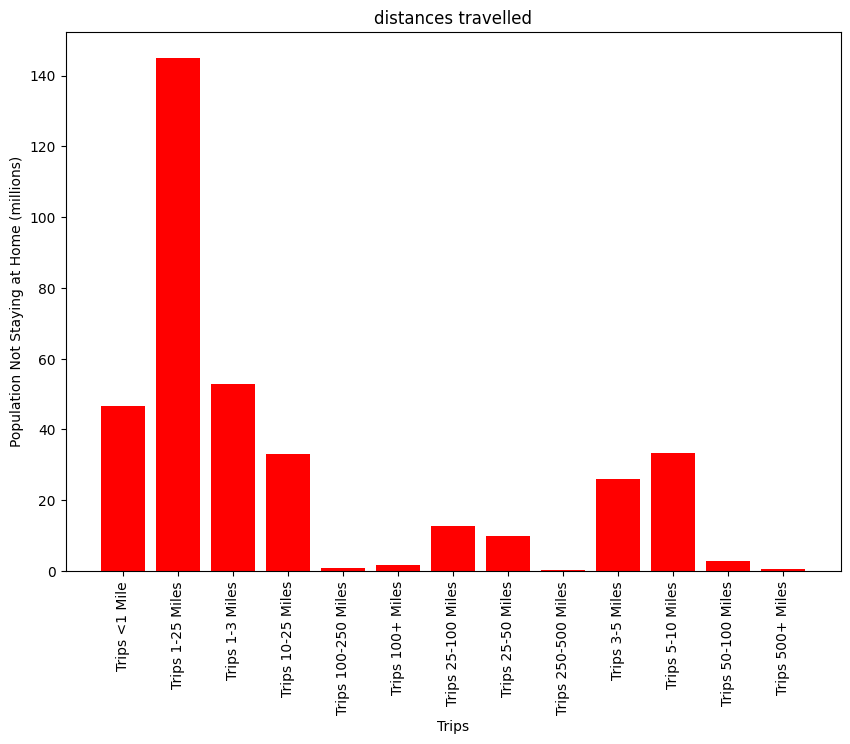

In [16]:
#plot the data
fig, ax = plt.subplots()
fig.set_size_inches(10,7)
plt.bar(data.index, data.values, color = 'red')
ax.set_title('distances travelled')
ax.set_ylabel('Population Not Staying at Home (millions)')
ax.set_xlabel('Trips')
ax.set_xticklabels(data.index, rotation=90)
plt.show()
#change all labels and siize of this code 


In [17]:
#1b
data_distance = df[['Date', 'Number of Trips 10-25', 'Number of Trips 50-100']]
filtered_data = data_distance[data_distance['Number of Trips 50-100'] > 10000000]
filtered_data2 = data_distance[data_distance['Number of Trips 10-25'] > 100000000]

#find dates that are the same in both dataframes
filtered_data = filtered_data[filtered_data['Date'].isin(filtered_data2['Date'])]

filtered_data

#compare the dates eventually

,Date,Number of Trips 10-25,Number of Trips 50-100
0,1/1/2019,116904343.0,15686639.0
1,1/2/2019,167412698.0,17739183.0
2,1/3/2019,172027487.0,18366626.0
3,1/4/2019,176144493.0,19315785.0
4,1/5/2019,165239790.0,19363939.0
...,...,...,...
157189,6/15/2021,200549282.0,19181256.0
157190,6/16/2021,199082591.0,19247409.0
157191,6/17/2021,198280332.0,19277452.0
157192,6/18/2021,202609024.0,22229709.0


Text(0.5, 0, 'Date')

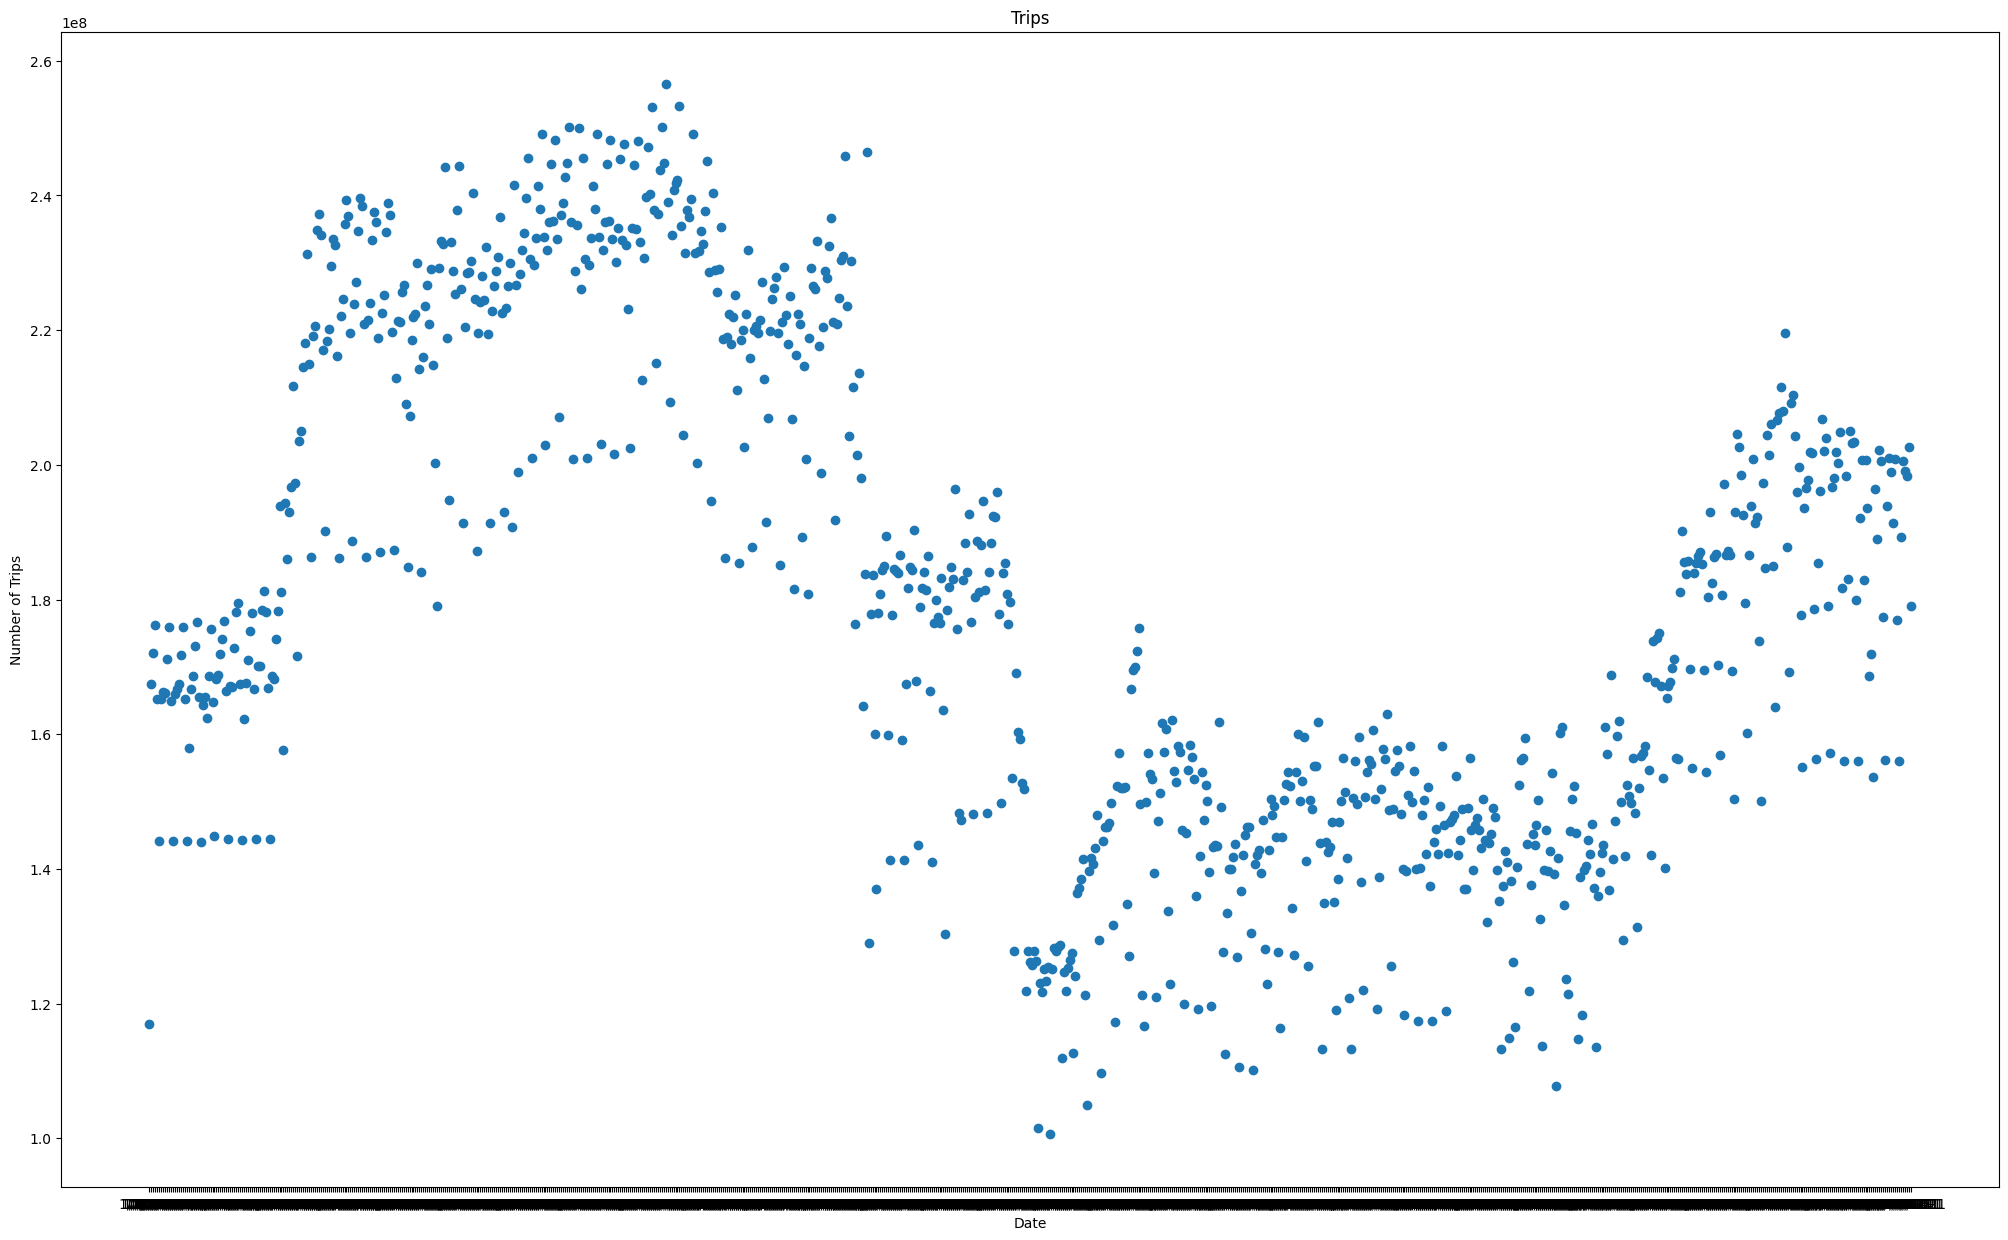

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(25,15)
ax.scatter(filtered_data['Date'], filtered_data['Number of Trips 10-25'])
ax.set_title('Trips')
ax.set_ylabel('Number of Trips')
ax.set_xlabel('Date')

Text(0.5, 0, 'Date')

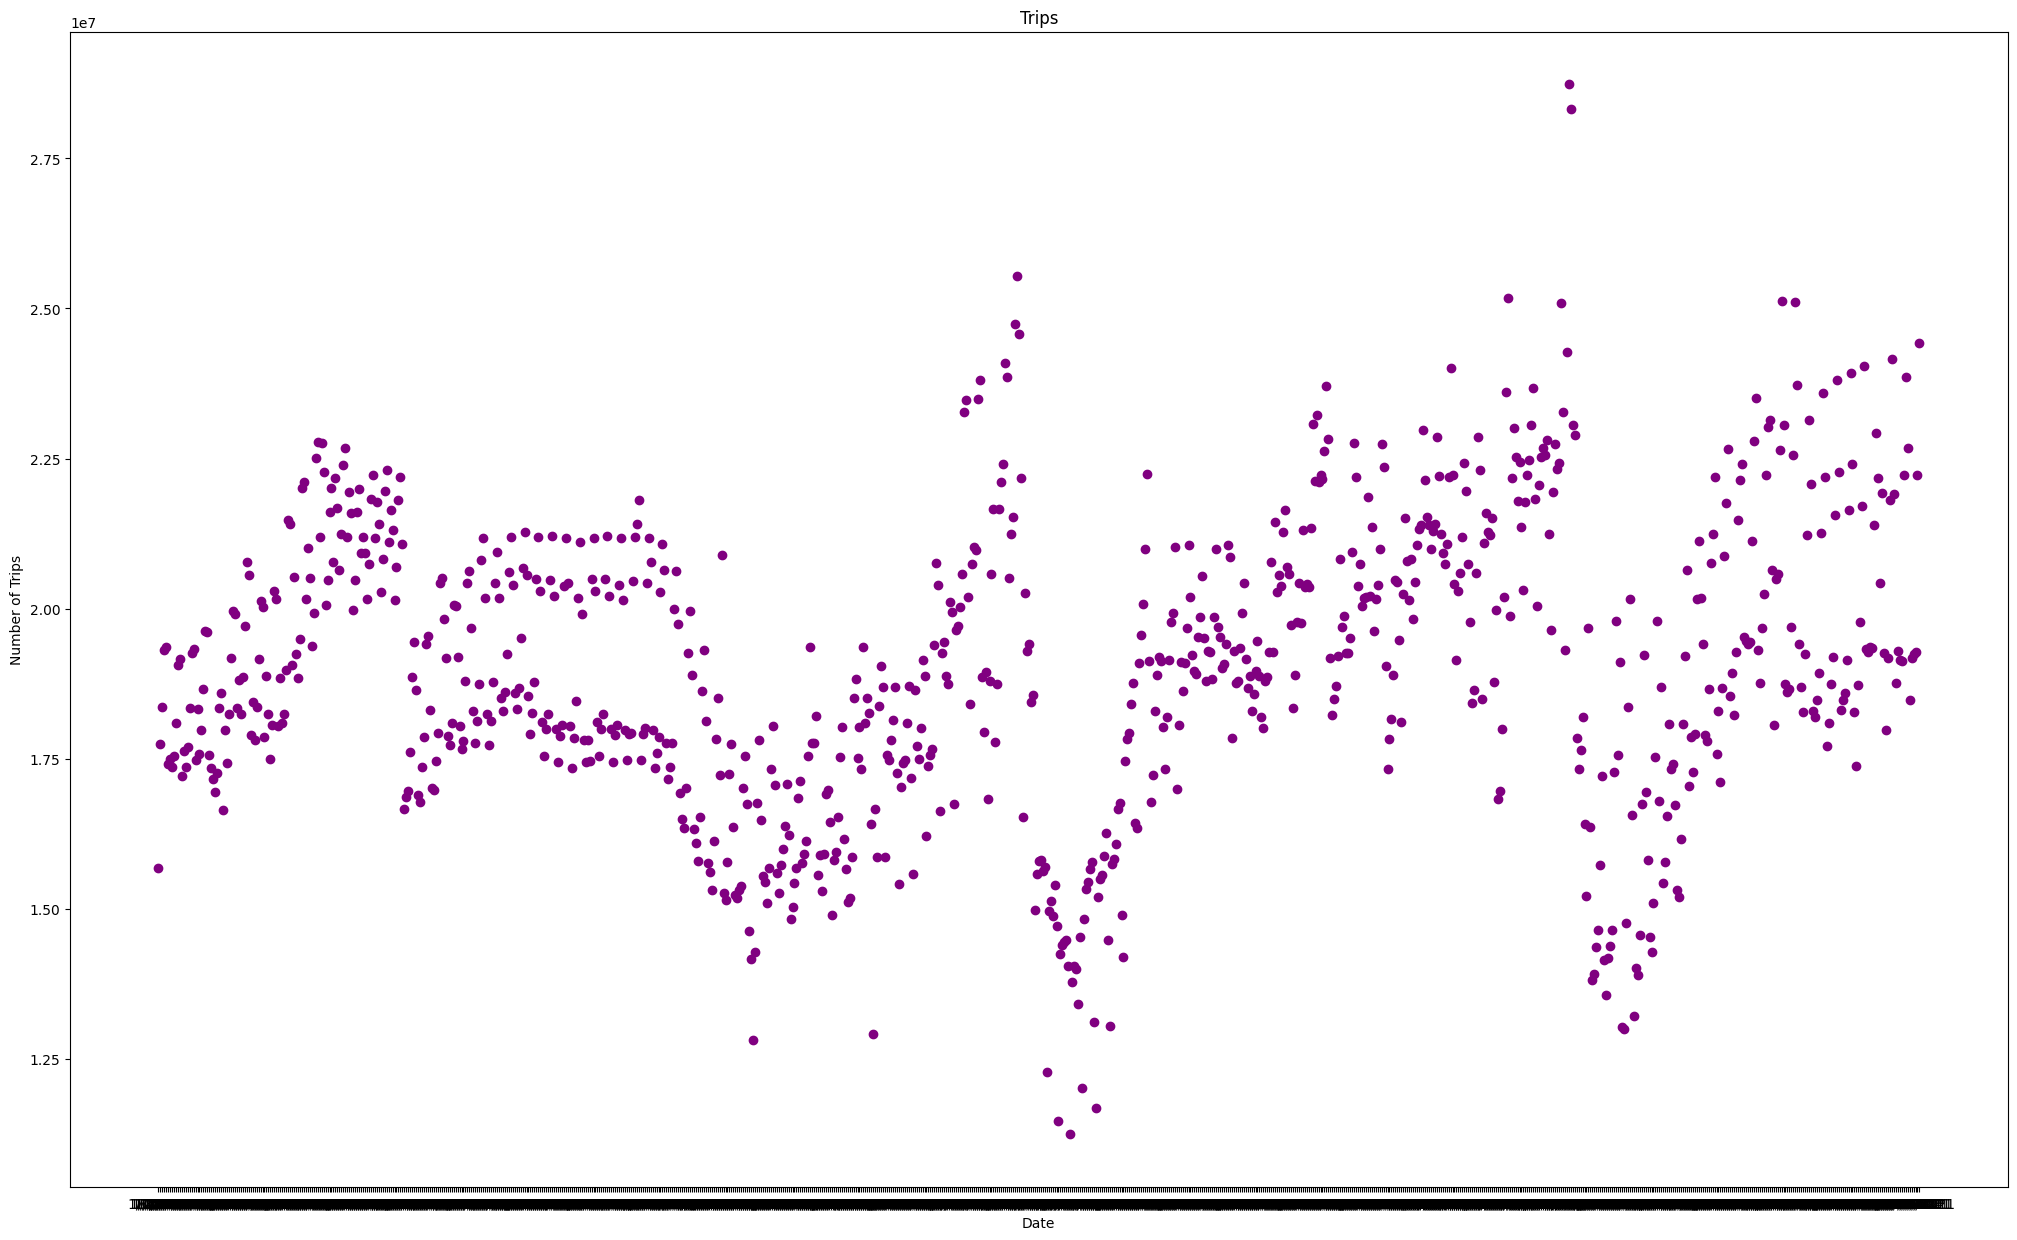

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(25,15)
ax.scatter(filtered_data['Date'], filtered_data['Number of Trips 50-100'], color= 'purple')
ax.set_title('Trips')
ax.set_ylabel('Number of Trips')
ax.set_xlabel('Date')

In [20]:
# 1c
#  dask processing 
# convert to dask dataframe

In [21]:

client = Client(threads_per_worker = 4, n_workers =10)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 10
Total threads: 40,Total memory: 8.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:56293,Workers: 10
Dashboard: http://127.0.0.1:8787/status,Total threads: 40
Started: Just now,Total memory: 8.00 GiB
Comm: tcp://127.0.0.1:56320,Total threads: 4
Dashboard: http://127.0.0.1:56321/status,Memory: 819.20 MiB
Nanny: tcp://127.0.0.1:56297,


2024-04-11 13:45:07,985 - tornado.application - ERROR - Exception in callback <bound method SystemMonitor.update of <SystemMonitor: cpu: 13 memory: 49 MB fds: 283>>
Traceback (most recent call last):
  File "/Users/sdg1/Library/Python/3.12/lib/python/site-packages/tornado/ioloop.py", line 937, in _run
    val = self.callback()
          ^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/distributed/system_monitor.py", line 168, in update
    net_ioc = psutil.net_io_counters()
              ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sdg1/Library/Python/3.12/lib/python/site-packages/psutil/__init__.py", line 2166, in net_io_counters
    rawdict = _psplatform.net_io_counters()
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: [Errno 12] Cannot allocate memory
2024-04-11 23:25:07,976 - tornado.application - ERROR - Exception in callback <bound method SystemMonitor.update of <SystemMonitor: cpu: 14 memory: 41 MB fds: 285>>
Traceback (most

In [22]:
ddf = dd.read_csv('Trips_by_Distance.csv', dtype={'Level': 'object', 'Population Staying at Home': 'float64', 'Date': 'object'})
ddf2 = dd.read_csv('Trips_Full Data.csv')
#Loading the datasets using Dask

In [23]:
for n_workers in [10, 20]: #n_workers being the number of processors 
        start_time = time.time()
        national_avg = national_avg.groupby(national_avg.index)['Population Staying at Home'].mean().reset_index()
        national_avg_distanced_travelled = ddf2[('Trips')]
        end_time = time.time() - start_time
        time_taken= end_time
        print(f"Time taken with {n_workers} processors: {end_time} seconds")

Time taken with 10 processors: 0.0018050670623779297 seconds
Time taken with 20 processors: 0.0010349750518798828 seconds


/var/folders/_c/plq7rzt57pl127fc12_lbc040000gn/T/ipykernel_44159/2414749144.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data.index, rotation=90)


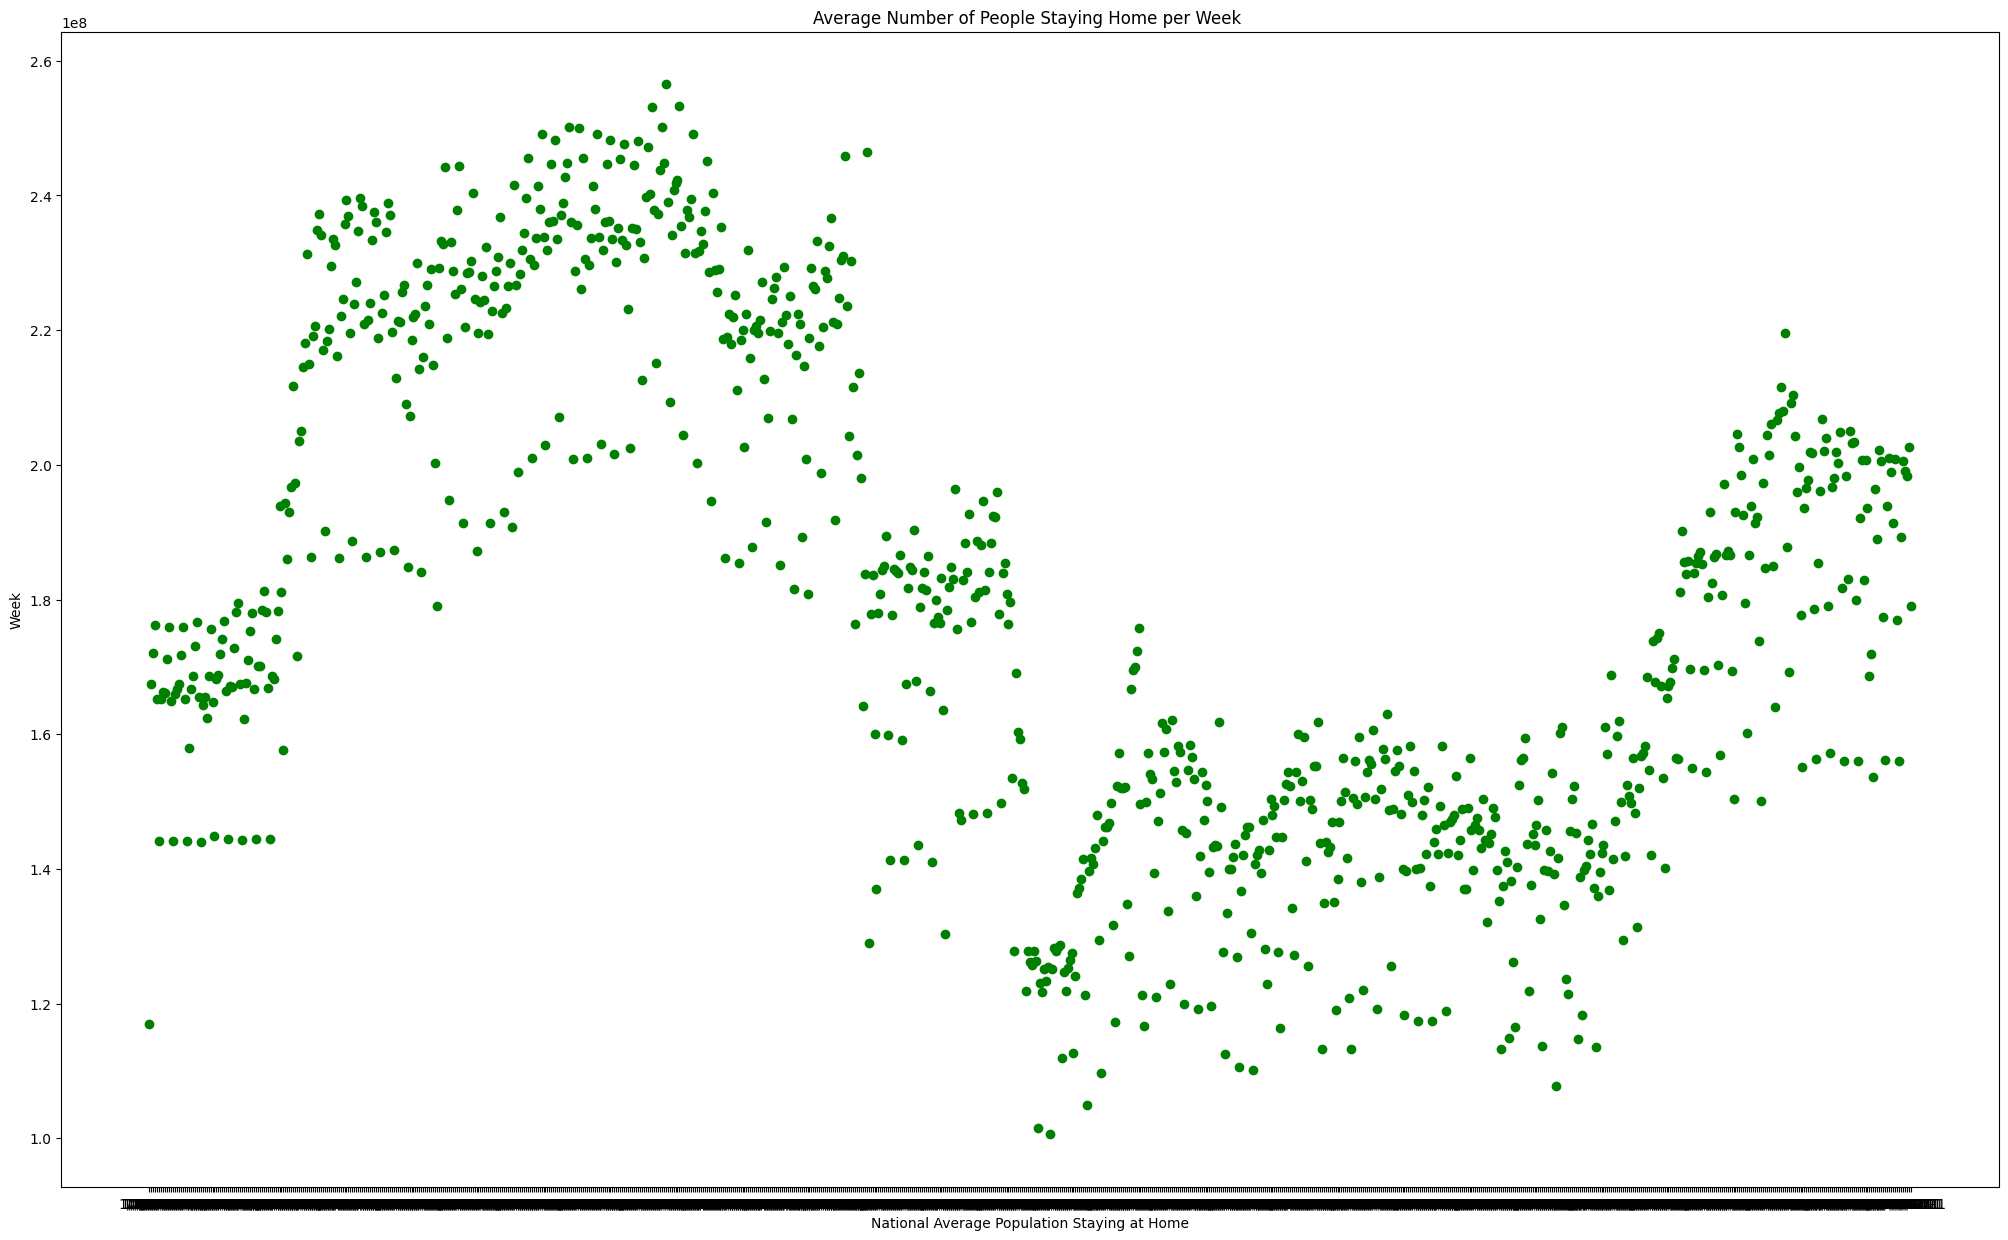

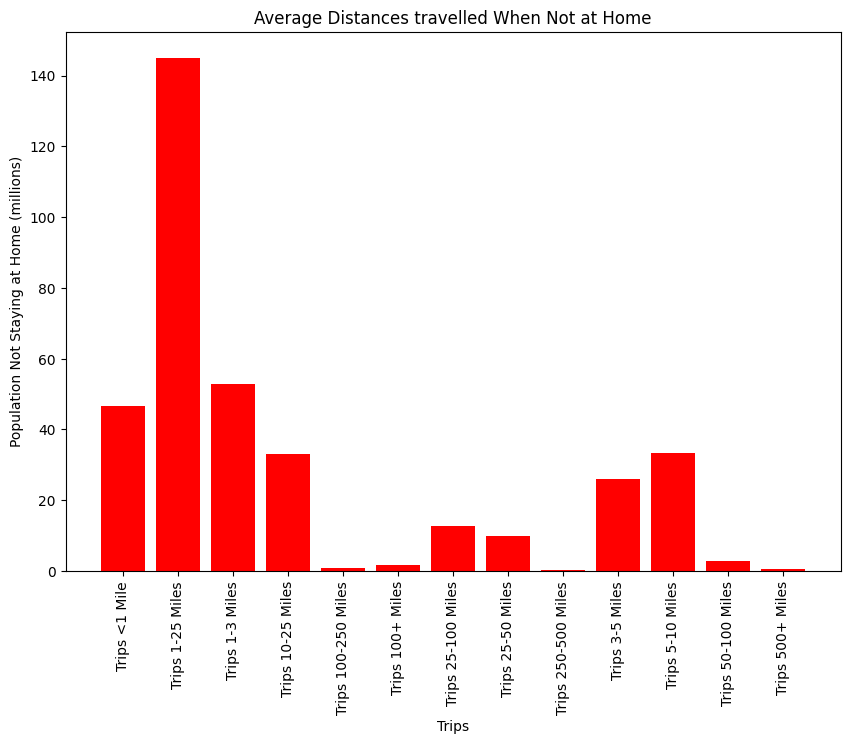

In [24]:
#Scatter Plot for Average People Staying at Home per Week
fig, ax = plt.subplots()
fig.set_size_inches(25,15)
ax.scatter(filtered_data['Date'], filtered_data['Number of Trips 10-25'], color= "green")
ax.set_title('Average Number of People Staying Home per Week ')
ax.set_ylabel('Week')
ax.set_xlabel('National Average Population Staying at Home')

# Bar Plot for "How far are people traveling when they don't stay at Home"
fig, ax = plt.subplots()
fig.set_size_inches(10,7)
plt.bar(data.index, data.values, color = 'red')
ax.set_title('Average Distances travelled When Not at Home')
ax.set_ylabel('Population Not Staying at Home (millions)')
ax.set_xlabel('Trips')
ax.set_xticklabels(data.index, rotation=90)
plt.show()


In [25]:
#1d
# Check for missing values
print(df.isnull().sum())
print(df2.isnull().sum())

Level                                 0
Date                                  0
State FIPS                          901
State Postal Code                   901
County FIPS                       46852
County Name                       46852
Population Staying at Home        12950
Population Not Staying at Home    12950
Number of Trips                   12950
Number of Trips <1                12950
Number of Trips 1-3               12950
Number of Trips 3-5               12950
Number of Trips 5-10              12950
Number of Trips 10-25             12950
Number of Trips 25-50             12950
Number of Trips 50-100            12950
Number of Trips 100-250           12950
Number of Trips 250-500           12950
Number of Trips >=500             12950
Row ID                                0
Week                                  0
Month                                 0
dtype: int64
Month of Date                 0
Week of Date                  0
Year of Date                  0
Level      

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from dask_ml.model_selection import train_test_split
import statsmodels.api as sm

In [38]:
x = df2[['Trips 1-25 Miles', 'Trips 25-100 Miles']]
y = df [['Number of Trips 5-10', 'Number of Trips 10-25']]


In [42]:
def linear_model(x, y):
    model = LinearRegression()
    model.fit(x, y)
    r_sq = model.score(x, y)
    print(r_sq)
    print(f"coefficient of determination: {r_sq}")
    print(f"intercept: {model.intercept_}")
    print(f"coefficients: {model.coef_}")
    # Model to predict the response
    y_pred = model.predict(x)
    print(f"predicted response:\n{y_pred}")
    
    
def multiple_linear(x, y):
    model = LinearRegression()
    model.fit(x, y)
    r_sq = model.score(x, y)
    print(r_sq)
    print(f"coefficient of determination: {r_sq}")
    print(f"intercept: {model.intercept_}")
    print(f"coefficients: {model.coef_}")
    # Model to predict the response
    y_pred = model.predict(x)
    print(f"predicted response:\n{y_pred}")
    
    
def polynomial(x, y):
    # Transform input data
    x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)
    # Create a model and fit it
    model = LinearRegression().fit(x_, y)
    # Get results
    r_sq = model.score(x_, y)
    intercept, coefficients = model.intercept_, model.coef_
    # Predict response
    y_pred = model.predict(x_)

    print(r_sq)
    print(f"coefficient of determination: {r_sq}")
    print(f"intercept: {intercept}")
    print(f"coefficients: {coefficients}")
    # Model to predict the response
    print(f"predicted response:\n{y_pred}")


def adv_linear_model(df2, df):
    # Extracting the required columns from clean_df_full
    df_cleaned = df_cleaned[["Trips 10-25 Miles", "Trips 5-10 Miles"]]
    
    # Extracting the required column from sampled_df
    x = df_cleaned.loc[:, "Number of Trips 25-50"].values.reshape(-1, 1)
    
    # Extracting the required column from clean_df_full
    y = df2.loc[:, 'Trips 10-25 Miles'].values.reshape(-1, 1)
    
    x = sm.add_constant(x)
    
    # Create the model and fit it
    model = sm.OLS(y, x)
    results = model.fit()
    
    # Printing the results
    print(results.summary())
    print(f"coefficient of determination: {results.rsquared}")
    print(f"adjusted coefficient of determination: {results.rsquared_adj}")
    print(f"regression coefficients: {results.params}")
    
    # Predict response
    print(f"predicted response:\n{results.fittedvalues}")
    print(f"predicted response:\n{results.predict(x)}")


    
    
def model_training(x, y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, shuffle=False)
    model = RandomForestClassifier(verbose=1)
    print(X_train)
    print(X_test)
    print(model.fit(X_train, y_train))
    predictions = model.predict(X_test)
    print(predictions)

In [43]:
import pandas as pd

# Set the desired number of samples
desired_samples = 7  # Adjust this number based on your requirements

# Perform simple random sampling
sampled_df = df.sample(n=desired_samples, random_state=42)  # Adjust the random_state as needed for reproducibility

print("Shape of X:", sampled_df.shape)
print("Shape of y:", df2.shape)


# Now, 'sampled_df' contains a random subset of rows from your original dataset with the desired number of samples.

Shape of X: (7, 22)
Shape of y: (7, 22)


In [52]:
# Perform simple random sampling
sampled_df = df.sample(n=desired_samples, random_state=42)  # Adjust the random_state as needed for reproducibili
cleandf2=df2.dropna()

In [53]:
print("Testing linear_model:")
linear_model(cleandf2['Trips 1-25 Miles'].values.reshape(-1, 1), sampled_df[['Number of Trips 5-10', 'Number of Trips 10-25']])

Testing linear_model:
0.3511250007774919
coefficient of determination: 0.3511250007774919
intercept: [-1658115.12396638  -655021.99013569]
coefficients: [[0.00172289]
 [0.00069842]]
predicted response:
[[-47283.06750441  -2030.94787061]
 [ 59373.33892657  41204.89271266]
 [ 89956.80913938  53602.66690037]
 [210359.15150976 102410.76624269]
 [ 37543.85391948  32355.76526346]
 [155735.68874168  80267.78011204]
 [135360.22526754  72008.07663939]]


0.3511250007774919
coefficient of determination: 0.3511250007774919
intercept: [-1658115.12396638  -655021.99013569]
coefficients: [[0.00172289]
 [0.00069842]]
predicted response:
[[-47283.06750441  -2030.94787061]
 [ 59373.33892657  41204.89271266]
 [ 89956.80913938  53602.66690037]
 [210359.15150976 102410.76624269]
 [ 37543.85391948  32355.76526346]
 [155735.68874168  80267.78011204]
 [135360.22526754  72008.07663939]]


TypeError: 'NoneType' object is not subscriptable

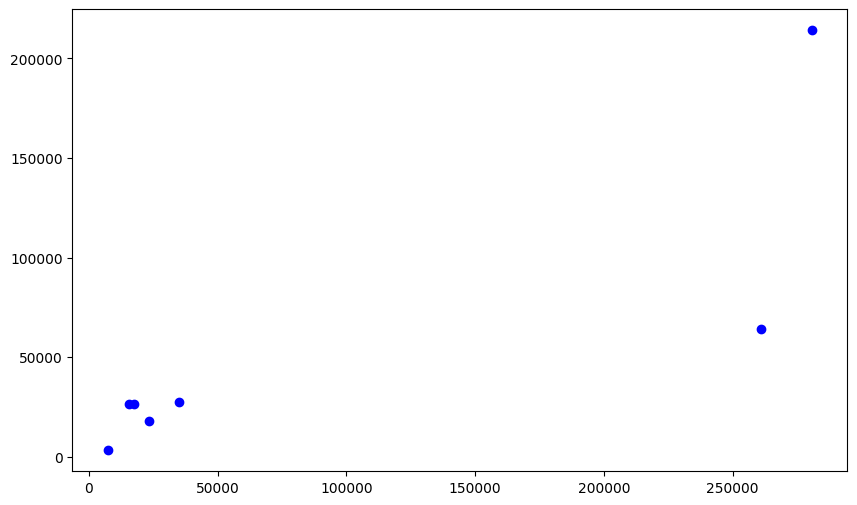

In [63]:
import matplotlib.pyplot as plt

# Call linear_model function and capture predicted responses
predicted_responses = linear_model(cleandf2['Trips 1-25 Miles'].values.reshape(-1, 1), sampled_df[['Number of Trips 5-10', 'Number of Trips 10-25']])

# Plotting the actual responses vs. predicted responses
plt.figure(figsize=(10, 6))
plt.scatter(sampled_df['Number of Trips 5-10'], sampled_df['Number of Trips 10-25'], color='blue', label='Actual Responses')
plt.scatter(sampled_df['Number of Trips 5-10'], predicted_responses[:, 1], color='red', label='Predicted Responses')
plt.xlabel('Number of Trips 5-10')
plt.ylabel('Number of Trips 10-25')
plt.title('Linear Regression Model: Actual vs. Predicted Responses')
plt.legend()
plt.grid(True)
plt.show()


/var/folders/_c/plq7rzt57pl127fc12_lbc040000gn/T/ipykernel_44159/507147143.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data.index, rotation=90)


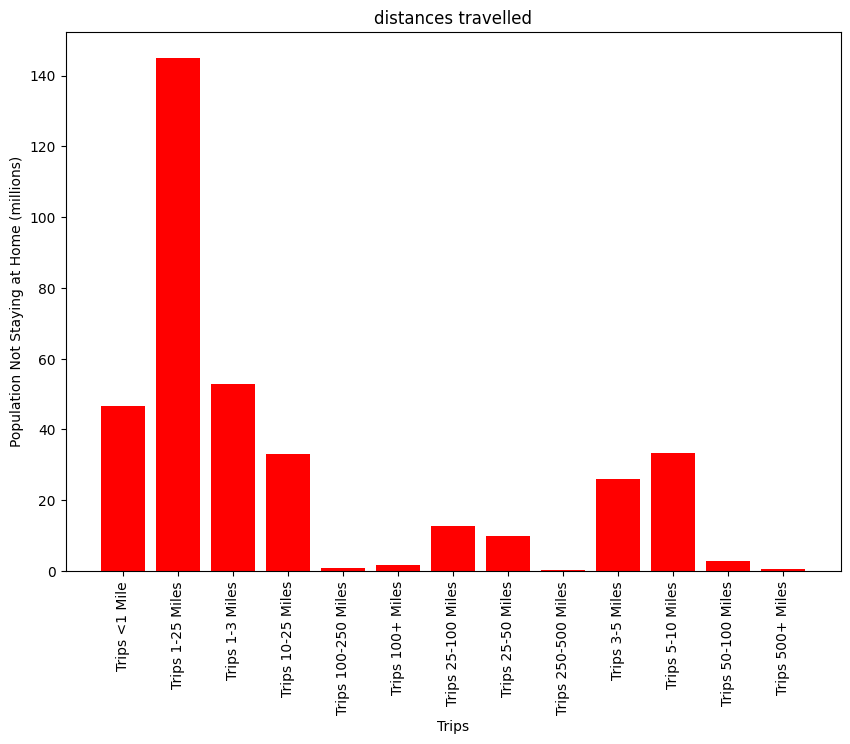

In [61]:
#1e)

#plot the data
fig, ax = plt.subplots()
fig.set_size_inches(10,7)
plt.bar(data.index, data.values, color = 'red')
ax.set_title('distances travelled')
ax.set_ylabel('Population Not Staying at Home (millions)')
ax.set_xlabel('Trips')
ax.set_xticklabels(data.index, rotation=90)
plt.show()
#change all labels and siize of this code 


In [32]:
number=7

sampled_df = df.sample(n=number, random_state=42)
print(filtered_data.shape)

(895, 3)
